# OneBoxes by Allegro

Find out which one is the greenest


In [2]:
import pandas as pd

In [3]:
one_boxes_raw = pd.read_json('../../data/oneboxes.json')
one_boxes_raw

id                  street postalCode                 city  \
0     AL003WPI               Główna 35     05-540              Ustanów   
1     AL068LU1      Janusza Korczaka 2     20-456               Lublin   
2     AL017GD1  Królowej Jadwigi 137 D     80-034               Gdańsk   
3     AL008ETM     Grota Roweckiego 16     97-200  Tomaszów Mazowiecki   
4     AL063LU1          Mełgiewska 7/9     20-209               Lublin   
...        ...                     ...        ...                  ...   
3199  AL025PZ1       ul. Swarzędzka 24     63-004            Gowarzewo   
3200  AL052GA1      Kmdr Z. Horyda 30a     81-185               Gdynia   
3201  AL001ELC               Zduńska 3     99-400               Łowicz   
3202  AL005KWA               Wenecja 6     34-100             Wadowice   
3203  AL003CBR              Mazurska 9     87-300             Brodnica   

            lat        lon  
0     51.999732  21.038228  
1     51.209371  22.582271  
2     54.325580  18.606516  
3     51.539197  20.013981  
4     51.247014  22.608377  
...         ...        ...  
3199  52.365880  17.121915  
3200  54.561661  18.484612  
3201  52.106626  19.942733  
3202  49.875420  19.512644  
3203  53.252423  19.401896  

[3204 rows x 6 columns]

In [4]:
import geopandas as gpd

In [5]:
one_boxes_gdf = gpd.GeoDataFrame(
    one_boxes_raw,
    geometry=gpd.GeoSeries.from_xy(one_boxes_raw["lon"], one_boxes_raw["lat"]),
    crs="EPSG:4326",
)
one_boxes_gdf.explore()

In [6]:
from srai.regionalizers import geocode_to_region_gdf

In [7]:
warsaw_region = geocode_to_region_gdf('Warsaw, PL')

In [59]:
warsaw_one_boxes = one_boxes_gdf.clip(warsaw_region)

In [60]:
import pydeck as pdk

icon_data = {
    "url": '../../data/onebox_circle.png',
    "width": 128,
    "height": 128,
    "anchorY": 128,
}

warsaw_one_boxes["icon_data"] = None
for i in warsaw_one_boxes.index:
    warsaw_one_boxes["icon_data"][i] = icon_data

view_state = pdk.data_utils.compute_view(warsaw_one_boxes[["lon", "lat"]], 0.1)

icon_layer = pdk.Layer(
    type="IconLayer",
    data=warsaw_one_boxes,
    get_icon="icon_data",
    get_size=16,
    size_scale=2,
    get_position=["lon", "lat"],
    pickable=True,
)

pdk.Deck(
    layers=[icon_layer],
    map_style="light",
    initial_view_state=view_state,
    tooltip={"text": "{id}: {street}"}
)

/mnt/c/Development/Python/srai-tutorial/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_26562/657740029.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warsaw_one_boxes["icon_data"][i] = icon_data


{
  "initialViewState": {
    "latitude": 52.22884947795821,
    "longitude": 21.012150944315543,
    "zoom": 12
  },
  "layers": [
    {
      "@@type": "IconLayer",
      "data": [
        {
          "city": "Warszawa",
          "geometry": {
            "coordinates": [
              21.019872,
              52.123682
            ],
            "type": "Point"
          },
          "icon_data": {
            "anchorY": 128,
            "height": 128,
            "url": "../../data/onebox_circle.png",
            "width": 128
          },
          "id": "AL004WN1",
          "lat": 52.123682,
          "lon": 21.019872,
          "postalCode": "02-844",
          "street": "Pu\u0142awska 543"
        },
        {
          "city": "Warszawa",
          "geometry": {
            "coordinates": [
              21.018937,
              52.12678
            ],
            "type": "Point"
          },
          "icon_data": {
            "anchorY": 128,
            "height": 128,
            "url": "../../data/onebox_circle.png",
            "width": 128
          },
          "id": "AL035WN1",
          "lat": 52.12678,
          "lon": 21.018937,
          "postalCode": "02-884",
          "street": "Pu\u0142awska 523"
        },
        {
          "city": "Warszawa",
          "geometry": {
            "coordinates": [
              21.006935,
              52.142766
            ],
            "type": "Point"
          },
          "icon_data": {
            "anchorY": 128,
            "height": 128,
            "url": "../../data/onebox_circle.png",
            "width": 128
          },
          "id": "AL016WN2",
          "lat": 52.142766,
          "lon": 21.006935,
          "postalCode": "02-830",
          "street": "Krasnowolska 33"
        },
        {
          "city": "Warszawa",
          "geometry": {
            "coordinates": [
              21.015171,
              52.150578
            ],
            "type": "Point"
          },
          "icon_data": {
            "anchorY": 128,
            "height": 128,
            "url": "../../data/onebox_circle.png",
            "width": 128
          },
          "id": "AL033WN1",
          "lat": 52.150578,
          "lon": 21.015171,
          "postalCode": "02-829",
          "street": "Taneczna 69"
        },
        {
          "city": "Warszawa",
          "geometry": {
            "coordinates": [
              21.019761,
              52.154755
            ],
            "type": "Point"
          },
          "icon_data": {
            "anchorY": 128,
            "height": 128,
            "url": "../../data/onebox_circle.png",
            "width": 128
          },
          "id": "AL018WN1",
          "lat": 52.154755,
          "lon": 21.019761,
          "postalCode": "02-784",
          "street": "Janowskiego 9"
        },
        {
          "city": "Warszawa",
          "geometry": {
            "coordinates": [
              21.019789,
              52.156991
            ],
            "type": "Point"
          },
          "icon_data": {
            "anchorY": 128,
            "height": 128,
            "url": "../../data/onebox_circle.png",
            "width": 128
          },
          "id": "AL008WN1",
          "lat": 52.156991,
          "lon": 21.019789,
          "postalCode": "02-784",
          "street": "Surowieckiego 12C"
        },
        {
          "city": "Warszawa",
          "geometry": {
            "coordinates": [
              21.018299,
              52.161039
            ],
            "type": "Point"
          },
          "icon_data": {
            "anchorY": 128,
            "height": 128,
            "url": "../../data/onebox_circle.png",
            "width": 128
          },
          "id": "AL019WN1",
          "lat": 52.161039,
          "lon": 21.018299,
          "postalCode": "02-785",
          "street": "Surowieckiego 4"
        },
        {
          "city": "Warszawa",
          "geometry": {
            "coor

In [15]:
warsaw_one_boxes_with_buffers = gpd.GeoDataFrame(
    data=warsaw_one_boxes,
    geometry=warsaw_one_boxes["geometry"].to_crs('EPSG:2180').buffer(1000).to_crs('EPSG:4326')
)
warsaw_one_boxes_with_buffers.explore(style_kwds=dict(opacity=0.5, fillOpacity=0.1))

In [16]:
from srai.loaders.osm_loaders import OSMPbfLoader

In [17]:
loader = OSMPbfLoader()

In [21]:
greenery = loader.load(
    warsaw_region,
    {
        "leisure": ["garden", "park"],
        "natural": ["wood", "scrub", "heath", "grassland"],
        "landuse": ["grass", "orchard", "flowerbed", "forest", "greenfield", "meadow"],
    },
)
greenery = greenery[greenery.geom_type != 'Point']
greenery

[Warsaw, Masovian Voivodeship, Poland] Counting pbf features: 5249943it [00:08, 596134.45it/s]
[Warsaw, Masovian Voivodeship, Poland] Parsing pbf file #1: 100%|█| 5249943/5249943 [00:20<00:00, 258073.51it/s


geometry landuse  \
feature_id                                                                     
way/4943389        MULTIPOLYGON (((21.00423 52.24188, 21.00430 52...     NaN   
way/4999161        MULTIPOLYGON (((21.01048 52.20521, 21.01052 52...     NaN   
way/5000672        MULTIPOLYGON (((20.95468 52.20686, 20.95524 52...     NaN   
way/5003248        MULTIPOLYGON (((21.02187 52.20334, 21.02215 52...     NaN   
way/5032842        MULTIPOLYGON (((21.01905 52.19749, 21.01916 52...     NaN   
...                                                              ...     ...   
way/1218998624     MULTIPOLYGON (((20.95237 52.22763, 20.95237 52...   grass   
way/1218998770     MULTIPOLYGON (((20.89171 52.21826, 20.89173 52...   grass   
relation/16410813  MULTIPOLYGON (((20.95257 52.34292, 20.95268 52...   grass   
relation/1746381   MULTIPOLYGON (((21.24084 52.14561, 21.24087 52...  forest   
relation/5669033   MULTIPOLYGON (((21.18079 52.20211, 21.18260 52...  forest   

                  leisure natural  
feature_id                         
way/4943389          park     NaN  
way/4999161          park     NaN  
way/5000672          park     NaN  
way/5003248          park     NaN  
way/5032842          park     NaN  
...                   ...     ...  
way/1218998624        NaN     NaN  
way/1218998770        NaN     NaN  
relation/16410813     NaN     NaN  
relation/1746381      NaN     NaN  
relation/5669033      NaN     NaN  

[82778 rows x 4 columns]

<Axes: >

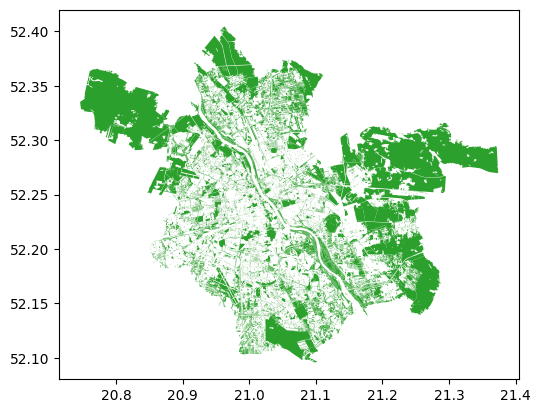

In [22]:
greenery.plot(color="tab:green")

In [29]:
warsaw_one_boxes_with_greenery = gpd.overlay(
    warsaw_one_boxes_with_buffers,
    greenery,
    how="intersection",
)

warsaw_one_boxes_with_greenery

id        street postalCode      city        lat        lon  \
0       AL004WN1  Puławska 543     02-844  Warszawa  52.123682  21.019872   
1       AL035WN1  Puławska 523     02-884  Warszawa  52.126780  21.018937   
2       AL004WN1  Puławska 543     02-844  Warszawa  52.123682  21.019872   
3       AL035WN1  Puławska 523     02-884  Warszawa  52.126780  21.018937   
4       AL004WN1  Puławska 543     02-844  Warszawa  52.123682  21.019872   
...          ...           ...        ...       ...        ...        ...   
363547  AL018WA1     Piwoniowa     03-074  Warszawa  52.355097  20.974530   
363548  AL018WA1     Piwoniowa     03-074  Warszawa  52.355097  20.974530   
363549  AL018WA1     Piwoniowa     03-074  Warszawa  52.355097  20.974530   
363550  AL018WA1     Piwoniowa     03-074  Warszawa  52.355097  20.974530   
363551  AL018WA1     Piwoniowa     03-074  Warszawa  52.355097  20.974530   

       landuse leisure    natural  \
0          NaN     NaN       wood   
1          NaN     NaN       wood   
2          NaN     NaN      scrub   
3          NaN     NaN      scrub   
4        grass     NaN        NaN   
...        ...     ...        ...   
363547     NaN     NaN  grassland   
363548     NaN     NaN  grassland   
363549     NaN     NaN       wood   
363550     NaN     NaN       wood   
363551     NaN     NaN       wood   

                                                 geometry  
0       POLYGON ((21.01688 52.13055, 21.01688 52.13074...  
1       POLYGON ((21.01688 52.13055, 21.01688 52.13074...  
2       POLYGON ((21.00563 52.12568, 21.00602 52.12653...  
3       POLYGON ((21.00454 52.12527, 21.00448 52.12553...  
4       POLYGON ((21.01262 52.12530, 21.01262 52.12493...  
...                                                   ...  
363547  POLYGON ((20.96951 52.35853, 20.97018 52.35865...  
363548  POLYGON ((20.96950 52.35890, 20.96992 52.35890...  
363549  POLYGON ((20.97009 52.35890, 20.97113 52.35889...  
363550  POLYGON ((20.97460 52.35739, 20.97489 52.35692...  
363551  POLYGON ((20.97480 52.35744, 20.97493 52.35722...  

[363552 rows x 10 columns]

In [30]:
# Dissolve replaces groupby in spatial operations
# https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html
warsaw_one_boxes_with_greenery = warsaw_one_boxes_with_greenery.dissolve(by='id')
warsaw_one_boxes_with_greenery.head()

geometry  \
id                                                            
AL001WA1  MULTIPOLYGON (((20.96840 52.29911, 20.96835 52...   
AL001WB1  MULTIPOLYGON (((20.88930 52.22171, 20.88949 52...   
AL001WD1  MULTIPOLYGON (((20.96244 52.27647, 20.96242 52...   
AL001WE1  MULTIPOLYGON (((21.01341 52.19138, 21.01330 52...   
AL001WF1  MULTIPOLYGON (((21.07415 52.23965, 21.07417 52...   

                               street postalCode      city        lat  \
id                                                                      
AL001WA1                  Piechocka 3     03-197  Warszawa  52.305324   
AL001WB1                  Lazurowa 69     01-314  Warszawa  52.229377   
AL001WD1                 Klaudyny 28A     01-684  Warszawa  52.283053   
AL001WE1                 Merliniego 4     02-511  Warszawa  52.195668   
AL001WF1  Al. Stanów Zjednoczonych 72     04-036  Warszawa  52.243419   

                lon landuse leisure natural  
id                                           
AL001WA1  20.979004  forest  garden   scrub  
AL001WB1  20.895071   grass  garden    wood  
AL001WD1  20.972099   grass    park    wood  
AL001WE1  21.026253  meadow    park   scrub  
AL001WF1  21.086133   grass    park    wood

<Axes: >

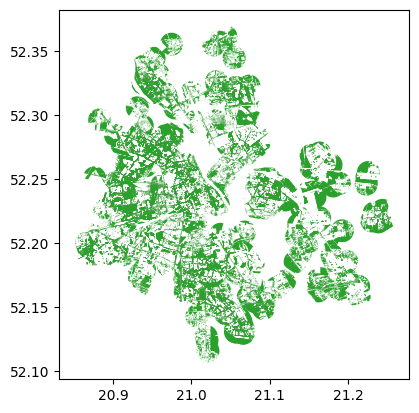

In [31]:
warsaw_one_boxes_with_greenery.plot(color='tab:green')

In [32]:
warsaw_one_boxes_with_greenery['greenery_area'] = warsaw_one_boxes_with_greenery['geometry'].area
warsaw_one_boxes_with_greenery = warsaw_one_boxes_with_greenery.sort_values(by='greenery_area', ascending=False)
warsaw_one_boxes_with_greenery.head()

/tmp/ipykernel_26562/558370583.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warsaw_one_boxes_with_greenery['greenery_area'] = warsaw_one_boxes_with_greenery['geometry'].area


geometry            street  \
id                                                                              
AL014WXY  MULTIPOLYGON (((21.16685 52.24172, 21.16677 52...      Warszawska 8   
AL009WT1  MULTIPOLYGON (((21.12081 52.18085, 21.12073 52...    Heliotropów 59   
AL005WWW  MULTIPOLYGON (((21.09096 52.14309, 21.09144 52...  Przyczółkowa 219   
AL030WT1  MULTIPOLYGON (((21.18173 52.20395, 21.18060 52...     Dzięcieliny 5   
AL006WT1  MULTIPOLYGON (((21.17810 52.15767, 21.17873 52...        Liliowa 37   

         postalCode      city        lat        lon landuse leisure  \
id                                                                    
AL014WXY     05-075  Warszawa  52.244353  21.180836  forest  garden   
AL009WT1     04-796  Warszawa  52.185052  21.132268   grass  garden   
AL005WWW     02-962  Warszawa  52.148573  21.091742   grass    park   
AL030WT1     04-745  Warszawa  52.209414  21.192574  forest    None   
AL006WT1     04-953  Warszawa  52.163569  21.188542  meadow    park   

            natural  greenery_area  
id                                  
AL014WXY       wood       0.000247  
AL009WT1      scrub       0.000244  
AL005WWW       wood       0.000240  
AL030WT1  grassland       0.000239  
AL006WT1  grassland       0.000233

In [34]:
m = warsaw_one_boxes_with_buffers.merge(
    warsaw_one_boxes_with_greenery["greenery_area"].reset_index(), on="id"
).explore(
    "greenery_area",
    cmap="BuGn",
    tiles="CartoDB positron",
    style_kwds=dict(opacity=0.5, fillOpacity=0.1),
)

warsaw_one_boxes.explore(m=m, color='green')

In [38]:
best_onebox_id = warsaw_one_boxes_with_greenery.index[0]
warsaw_one_boxes_with_greenery.loc[[best_onebox_id]].explore(color="green")